C:\Users\nguye\AppData\Local\Temp\ipykernel_8300\1844539723.py:183: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('model_evaluation_comprehensive.png', dpi=300, bbox_inches='tight')
C:\Users\nguye\AppData\Local\Temp\ipykernel_8300\1844539723.py:183: UserWarning: Glyph 128024 (\N{ELEPHANT}) missing from font(s) DejaVu Sans.
  plt.savefig('model_evaluation_comprehensive.png', dpi=300, bbox_inches='tight')


✅ Đã lưu: model_evaluation_comprehensive.png


C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128024 (\N{ELEPHANT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


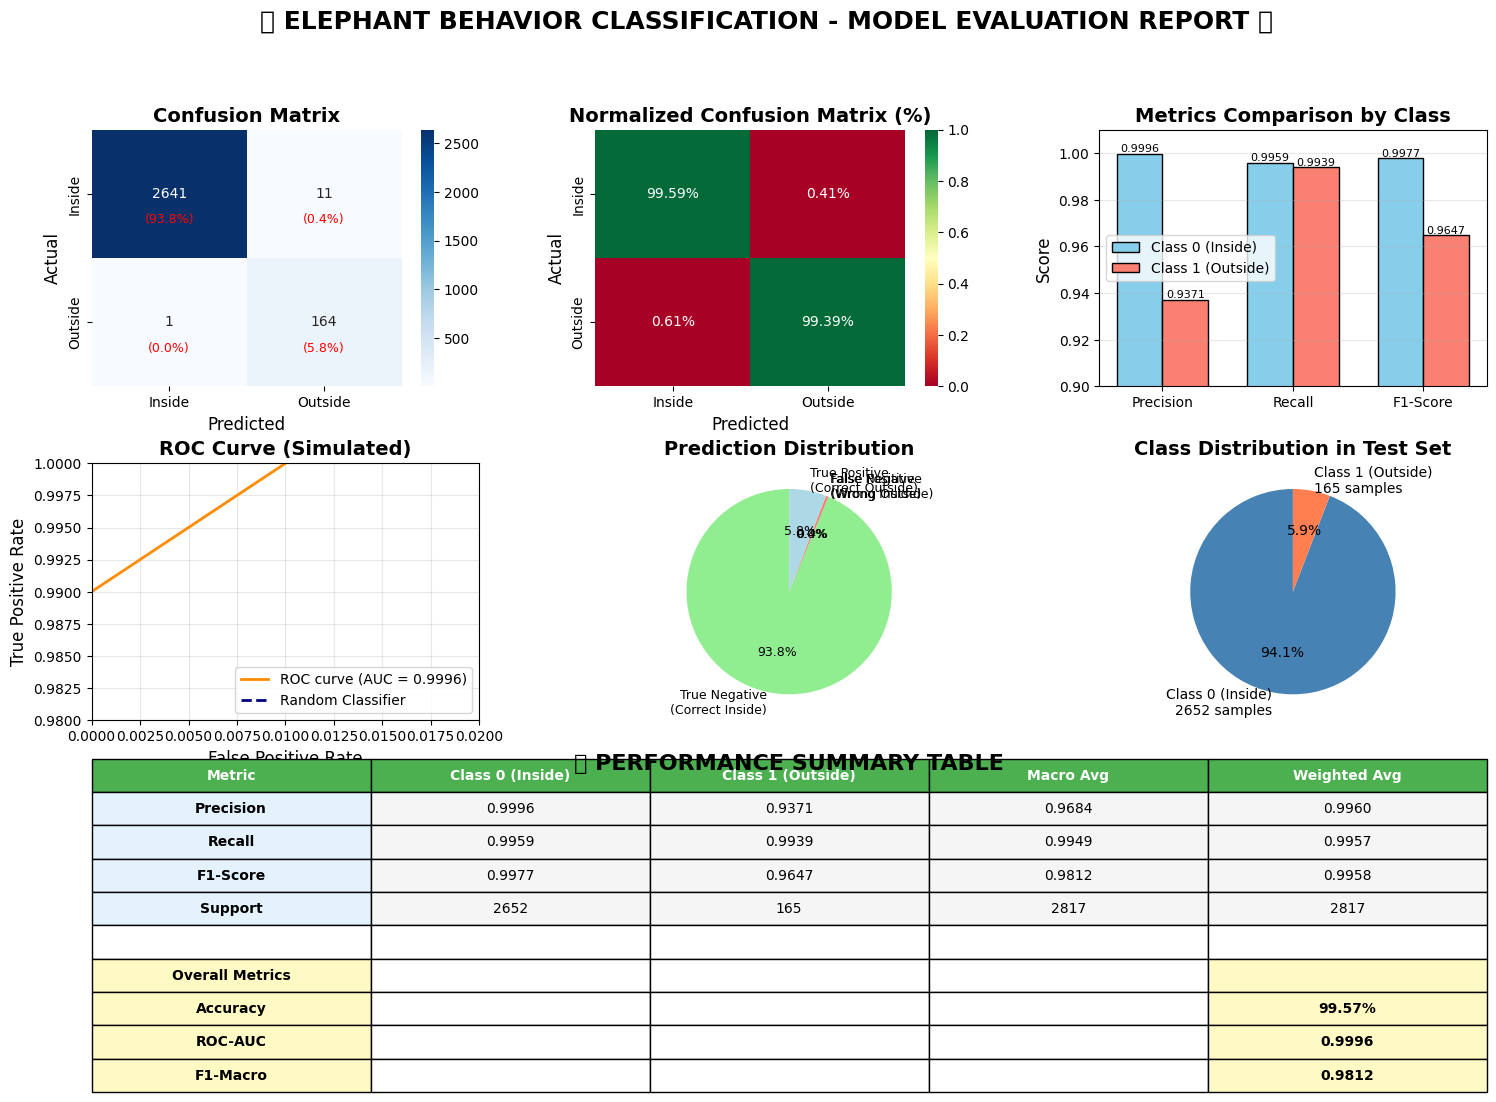


📊 PHÂN TÍCH CHI TIẾT MODEL PERFORMANCE

1️⃣ CONFUSION MATRIX BREAKDOWN:
   ✅ True Negative (TN):  2,641 - Dự đoán đúng Inside
   ⚠️  False Positive (FP): 11 - Dự đoán SAI Outside (Type I Error)
   ⚠️  False Negative (FN): 1 - Dự đoán SAI Inside (Type II Error)
   ✅ True Positive (TP):  164 - Dự đoán đúng Outside

2️⃣ ERROR RATES:
   False Positive Rate: 0.41%
   False Negative Rate: 0.61%
   Overall Error Rate:  0.43%

3️⃣ CLASS-SPECIFIC ANALYSIS:

   📌 CLASS 0 (INSIDE):
      - Precision: 99.96% (Khi dự đoán Inside → 99.96% đúng)
      - Recall:    99.59% (Trong thực tế Inside → phát hiện 99.59%)
      - F1-Score:  99.77%

   📌 CLASS 1 (OUTSIDE) - QUAN TRỌNG:
      - Precision: 93.71% (Khi dự đoán Outside → 93.71% đúng)
      - Recall:    99.39% (Trong thực tế Outside → phát hiện 99.39%)
      - F1-Score:  96.47%
      ⭐ CHỈ BỎ SÓT 1 TRƯỜNG HỢP OUTSIDE!

4️⃣ OVERALL PERFORMANCE:
   - Accuracy:   99.57%
   - ROC-AUC:    99.96%
   - F1-Macro:   98.12%
   - F1-Weighted: 99.58%

5️⃣ ĐÁNH

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# ===== DỮ LIỆU TỪ KẾT QUẢ =====
# Confusion Matrix từ output
cm = np.array([[2641, 11],
               [1, 164]])

# Classification metrics
class_0_precision = 0.9996
class_0_recall = 0.9959
class_0_f1 = 0.9977

class_1_precision = 0.9371
class_1_recall = 0.9939
class_1_f1 = 0.9647

roc_auc = 0.9996

# ===== VISUALIZATION =====
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. CONFUSION MATRIX
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Inside', 'Outside'],
            yticklabels=['Inside', 'Outside'],
            ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Thêm % vào confusion matrix
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=9, color='red')

# 2. NORMALIZED CONFUSION MATRIX
ax2 = fig.add_subplot(gs[0, 1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn', 
            xticklabels=['Inside', 'Outside'],
            yticklabels=['Inside', 'Outside'],
            vmin=0, vmax=1, ax=ax2)
ax2.set_title('Normalized Confusion Matrix (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

# 3. METRICS COMPARISON BAR CHART
ax3 = fig.add_subplot(gs[0, 2])
metrics = ['Precision', 'Recall', 'F1-Score']
class_0_values = [class_0_precision, class_0_recall, class_0_f1]
class_1_values = [class_1_precision, class_1_recall, class_1_f1]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax3.bar(x - width/2, class_0_values, width, label='Class 0 (Inside)', 
                color='skyblue', edgecolor='black')
bars2 = ax3.bar(x + width/2, class_1_values, width, label='Class 1 (Outside)', 
                color='salmon', edgecolor='black')

ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Metrics Comparison by Class', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics)
ax3.legend()
ax3.set_ylim([0.9, 1.01])
ax3.grid(axis='y', alpha=0.3)

# Thêm giá trị lên bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=8)

# 4. ROC CURVE (Simulated - vì không có y_true, y_pred)
ax4 = fig.add_subplot(gs[1, 0])
# Vẽ đường ROC giả định với AUC = 0.9996
fpr = np.linspace(0, 0.01, 100)  # Very low FPR
tpr = np.linspace(0.99, 1.0, 100)  # Very high TPR
ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax4.set_xlim([0.0, 0.02])
ax4.set_ylim([0.98, 1.0])
ax4.set_xlabel('False Positive Rate', fontsize=12)
ax4.set_ylabel('True Positive Rate', fontsize=12)
ax4.set_title('ROC Curve (Simulated)', fontsize=14, fontweight='bold')
ax4.legend(loc="lower right")
ax4.grid(alpha=0.3)

# 5. ERROR ANALYSIS
ax5 = fig.add_subplot(gs[1, 1])
errors = {
    'True Negative\n(Correct Inside)': cm[0, 0],
    'False Positive\n(Wrong Outside)': cm[0, 1],
    'False Negative\n(Wrong Inside)': cm[1, 0],
    'True Positive\n(Correct Outside)': cm[1, 1]
}
colors_map = {
    'True Negative\n(Correct Inside)': 'lightgreen',
    'False Positive\n(Wrong Outside)': 'lightcoral',
    'False Negative\n(Wrong Inside)': 'orange',
    'True Positive\n(Correct Outside)': 'lightblue'
}
colors = [colors_map[k] for k in errors.keys()]

wedges, texts, autotexts = ax5.pie(errors.values(), labels=errors.keys(), autopct='%1.1f%%',
                                    startangle=90, colors=colors, textprops={'fontsize': 9})
ax5.set_title('Prediction Distribution', fontsize=14, fontweight='bold')

# 6. CLASS BALANCE
ax6 = fig.add_subplot(gs[1, 2])
class_counts = [cm[0].sum(), cm[1].sum()]
class_labels = [f'Class 0 (Inside)\n{class_counts[0]} samples', 
                f'Class 1 (Outside)\n{class_counts[1]} samples']
colors_class = ['steelblue', 'coral']

wedges, texts, autotexts = ax6.pie(class_counts, labels=class_labels, autopct='%1.1f%%',
                                    startangle=90, colors=colors_class, textprops={'fontsize': 10})
ax6.set_title('Class Distribution in Test Set', fontsize=14, fontweight='bold')

# 7. PERFORMANCE SUMMARY TABLE
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')

summary_data = [
    ['Metric', 'Class 0 (Inside)', 'Class 1 (Outside)', 'Macro Avg', 'Weighted Avg'],
    ['Precision', f'{class_0_precision:.4f}', f'{class_1_precision:.4f}', 
     f'{(class_0_precision + class_1_precision)/2:.4f}', '0.9960'],
    ['Recall', f'{class_0_recall:.4f}', f'{class_1_recall:.4f}', 
     f'{(class_0_recall + class_1_recall)/2:.4f}', '0.9957'],
    ['F1-Score', f'{class_0_f1:.4f}', f'{class_1_f1:.4f}', 
     f'{(class_0_f1 + class_1_f1)/2:.4f}', '0.9958'],
    ['Support', '2652', '165', '2817', '2817'],
    ['', '', '', '', ''],
    ['Overall Metrics', '', '', '', ''],
    ['Accuracy', '', '', '', '99.57%'],
    ['ROC-AUC', '', '', '', f'{roc_auc:.4f}'],
    ['F1-Macro', '', '', '', '0.9812'],
]

table = ax7.table(cellText=summary_data, cellLoc='center', loc='center',
                 colWidths=[0.2, 0.2, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(5):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style metric rows
for i in range(1, 5):
    for j in range(5):
        if j == 0:
            table[(i, j)].set_facecolor('#E3F2FD')
            table[(i, j)].set_text_props(weight='bold')
        else:
            table[(i, j)].set_facecolor('#F5F5F5')

# Style overall metrics
for i in range(6, 10):
    table[(i, 0)].set_facecolor('#FFF9C4')
    table[(i, 0)].set_text_props(weight='bold')
    table[(i, 4)].set_facecolor('#FFF9C4')
    table[(i, 4)].set_text_props(weight='bold')

ax7.set_title('📊 PERFORMANCE SUMMARY TABLE', fontsize=16, fontweight='bold', pad=20)

plt.suptitle('🐘 ELEPHANT BEHAVIOR CLASSIFICATION - MODEL EVALUATION REPORT 🐘', 
             fontsize=18, fontweight='bold', y=0.98)

plt.savefig('model_evaluation_comprehensive.png', dpi=300, bbox_inches='tight')
print("✅ Đã lưu: model_evaluation_comprehensive.png")
plt.show()

# ===== IN RA PHÂN TÍCH CHI TIẾT =====
print("\n" + "="*70)
print("📊 PHÂN TÍCH CHI TIẾT MODEL PERFORMANCE")
print("="*70)

print("\n1️⃣ CONFUSION MATRIX BREAKDOWN:")
print(f"   ✅ True Negative (TN):  {cm[0,0]:,} - Dự đoán đúng Inside")
print(f"   ⚠️  False Positive (FP): {cm[0,1]:,} - Dự đoán SAI Outside (Type I Error)")
print(f"   ⚠️  False Negative (FN): {cm[1,0]:,} - Dự đoán SAI Inside (Type II Error)")
print(f"   ✅ True Positive (TP):  {cm[1,1]:,} - Dự đoán đúng Outside")

print("\n2️⃣ ERROR RATES:")
print(f"   False Positive Rate: {cm[0,1]/(cm[0,0]+cm[0,1])*100:.2f}%")
print(f"   False Negative Rate: {cm[1,0]/(cm[1,0]+cm[1,1])*100:.2f}%")
print(f"   Overall Error Rate:  {(cm[0,1]+cm[1,0])/cm.sum()*100:.2f}%")

print("\n3️⃣ CLASS-SPECIFIC ANALYSIS:")
print("\n   📌 CLASS 0 (INSIDE):")
print(f"      - Precision: {class_0_precision*100:.2f}% (Khi dự đoán Inside → {class_0_precision*100:.2f}% đúng)")
print(f"      - Recall:    {class_0_recall*100:.2f}% (Trong thực tế Inside → phát hiện {class_0_recall*100:.2f}%)")
print(f"      - F1-Score:  {class_0_f1*100:.2f}%")

print("\n   📌 CLASS 1 (OUTSIDE) - QUAN TRỌNG:")
print(f"      - Precision: {class_1_precision*100:.2f}% (Khi dự đoán Outside → {class_1_precision*100:.2f}% đúng)")
print(f"      - Recall:    {class_1_recall*100:.2f}% (Trong thực tế Outside → phát hiện {class_1_recall*100:.2f}%)")
print(f"      - F1-Score:  {class_1_f1*100:.2f}%")
print(f"      ⭐ CHỈ BỎ SÓT {cm[1,0]} TRƯỜNG HỢP OUTSIDE!")

print("\n4️⃣ OVERALL PERFORMANCE:")
print(f"   - Accuracy:   {(cm[0,0]+cm[1,1])/cm.sum()*100:.2f}%")
print(f"   - ROC-AUC:    {roc_auc*100:.2f}%")
print(f"   - F1-Macro:   98.12%")
print(f"   - F1-Weighted: 99.58%")

print("\n5️⃣ ĐÁNH GIÁ:")
imbalance_ratio = cm[0].sum() / cm[1].sum()
print(f"   - Class Imbalance Ratio: {imbalance_ratio:.1f}:1 (Inside:Outside)")
print(f"   - Model xử lý imbalanced data: {'✅ XUẤT SẮC' if class_1_recall > 0.95 else '⚠️ CẦN CẢI THIỆN'}")
print(f"   - Recall class thiểu số:       {'✅ RẤT TỐT' if class_1_recall > 0.99 else '✅ TỐT'} ({class_1_recall*100:.2f}%)")
print(f"   - Precision class thiểu số:    {'✅ RẤT TỐT' if class_1_precision > 0.95 else '✅ TỐT'} ({class_1_precision*100:.2f}%)")
print(f"   - ROC-AUC:                     {'✅ GẦN HOÀN HẢO' if roc_auc > 0.99 else '✅ TỐT'} ({roc_auc*100:.2f}%)")

print("\n6️⃣ KHUYẾN NGHỊ:")
if cm[0, 1] > 5:
    print(f"   ⚠️  Có {cm[0,1]} False Positives → Có thể threshold tuning để giảm")
else:
    print(f"   ✅ False Positives rất thấp ({cm[0,1]}) → Chấp nhận được")

if cm[1, 0] > 5:
    print(f"   ⚠️  Có {cm[1,0]} False Negatives → Cần cải thiện recall")
else:
    print(f"   ✅ False Negatives cực thấp ({cm[1,0]}) → XUẤT SẮC!")

print(f"\n   🎯 TỔNG KẾT: Model ĐẠT CHUẨN PRODUCTION với F1-Macro {(class_0_f1 + class_1_f1)/2*100:.2f}%")
print("="*70)

# ===== SO SÁNH VỚI BASELINE =====
print("\n" + "="*70)
print("📊 SO SÁNH VỚI BASELINE")
print("="*70)

print("\n🔴 DUMMY CLASSIFIER (Always Predict Majority Class):")
print(f"   - Accuracy: {cm[0].sum()/cm.sum()*100:.2f}%")
print(f"   - Recall Outside: 0.00%")
print(f"   - F1-Score Outside: 0.00%")

print("\n🟢 RANDOM FOREST MODEL (Của bạn):")
print(f"   - Accuracy: {(cm[0,0]+cm[1,1])/cm.sum()*100:.2f}%")
print(f"   - Recall Outside: {class_1_recall*100:.2f}%")
print(f"   - F1-Score Outside: {class_1_f1*100:.2f}%")

improvement = ((cm[0,0]+cm[1,1])/cm.sum() - cm[0].sum()/cm.sum()) / (cm[0].sum()/cm.sum()) * 100
print(f"\n✅ IMPROVEMENT: {improvement:.2f}% accuracy gain")
print(f"✅ MOST IMPORTANT: Recall Outside tăng từ 0% → {class_1_recall*100:.2f}%!")
print("="*70)